<img src="https://www.projectcubicle.com/wp-content/uploads/2022/04/Ethical-Problem-of-Artificial-Intelligence-4.jpg"><br>
# <center><strong><font color=orange> Utilizando a Biblioteca PyCaret para Prever Pre√ßos de A√ß√µes </font></strong></center>

## <strong>Introdu√ß√£o</strong><br>

Este desafio teve como objetivo principal empregar t√©cnicas avan√ßadas de aprendizado de m√°quina (machine learning) para desenvolver um Modelo Preditivo capaz de estimar com precis√£o o pre√ßo de fechamento das a√ß√µes da Petrobras ou de outras empresas extra√≠das do site <a href="https://br.financas.yahoo.com/screener">Yahoo Finan√ßas</a>. A abordagem escolhida para esta an√°lise √© a regress√£o linear, um m√©todo estat√≠stico robusto e amplamente utilizado para modelar a rela√ß√£o entre vari√°veis e fazer previs√µes.

Para alcan√ßar este objetivo, utilizaremos a biblioteca <a href="https://pycaret.org/">PyCaret</a>, uma ferramenta de c√≥digo aberto e baixo c√≥digo (low-code) projetada para simplificar e automatizar o processo de cria√ß√£o de modelos de machine learning em Python. A `PyCaret` oferece uma s√©rie de vantagens significativas para este projeto:

1. Ela permite desenvolver um Modelo Preditivo capaz de estimar com precis√£o o pre√ßo de fechamento das a√ß√µes da Petrobras, uma das maiores empresas petrol√≠feras do mundo e um dos pilares da economia brasileira.

2. Simplifica e automatiza o processo de cria√ß√£o de modelos de machine learning, tornando o desenvolvimento mais eficiente e acess√≠vel.

## A PyCaret oferece uma s√©rie de vantagens significativas para este projeto:<br>

- **`Efici√™ncia`**: Permite a r√°pida experimenta√ß√£o e compara√ß√£o de m√∫ltiplos modelos de regress√£o.
- **`Facilidade de uso`**: Sua interface intuitiva reduz a complexidade do desenvolvimento de modelos, tornando-o acess√≠vel mesmo para profissionais com experi√™ncia limitada em programa√ß√£o.
- **`Automa√ß√£o`**: Oferece funcionalidades automatizadas para pr√©-processamento de dados, sele√ß√£o de features, treinamento de modelos e otimiza√ß√£o de hiperpar√¢metros.
- **`Flexibilidade`**: Suporta uma ampla gama de algoritmos de machine learning e permite f√°cil integra√ß√£o com outras bibliotecas populares do ecossistema Python.

Ao longo deste estudo, exploraremos diversas vari√°veis que podem influenciar o pre√ßo das a√ß√µes, como indicadores econ√¥micos, pre√ßos de uma empresa no mercado internacional, dados fundamentalistas da empresa e an√°lises t√©cnicas do mercado de a√ß√µes. O **Modelo de Regress√£o Linear** ser√° treinado com dados hist√≥ricos e sua performance ser√° avaliada utilizando m√©tricas apropriadas, como o erro m√©dio quadr√°tico (MSE) e o coeficiente de determina√ß√£o (R¬≤).<br>

Al√©m disso, discutiremos as implica√ß√µes pr√°ticas deste `Modelo Preditivo`, suas limita√ß√µes e poss√≠veis aplica√ß√µes no contexto do `Mercado Financeiro` e da tomada de decis√µes de investimento. Este estudo n√£o apenas demonstrar√° a aplica√ß√£o pr√°tica de t√©cnicas de **Machine Learning em Finan√ßas**, mas tamb√©m fornecer√° insights valiosos sobre os fatores que influenciam o comportamento das a√ß√µes de empresas do Brasil e de outros paises.<br>

<strong><hr></strong>

### <strong> Importando as Bibliotecas Necess√°rias </strong>

No c√≥digo a seguir, ser√° utilizada a **Biblioteca** `yfinance` para baixar dados financeiros de a√ß√µes, se precisar. O comando `%pip install --upgrade yfinance` √© usado para atualizar a biblioteca **yfinance**. Esta biblioteca facilita a obten√ß√£o de dados financeiros hist√≥ricos e em tempo real, permitindo que os usu√°rios realizem an√°lises financeiras de forma program√°tica no Python.

In [ ]:
# Usar esse comando SE precisar atualizar o m√≥dulo
%pip install --upgrade yfinance

No c√≥digo a seguir, est√° sendo **importada a biblioteca** `pandas` como `pd` e **importada a biblioteca** `yfinance` como `yf`. A **biblioteca** `pandas` √© utilizada para manipula√ß√£o e an√°lise de dados, enquanto a **biblioteca** `yfinance` √© usada para acessar dados financeiros hist√≥ricos e em tempo real do Yahoo Finance.

In [1]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

### <strong> Obter dados de a√ß√µes usando a classe `Ticker` e o m√©todo `history` </strong>

No c√≥digo a seguir, est√° sendo utilizado a **biblioteca** `yfinance` para obter dados de a√ß√µes. A **fun√ß√£o** `yf.Ticker` √© usada para criar um objeto `Ticker` associado ao s√≠mbolo da a√ß√£o 'RADL3.SA'. Em seguida, a **fun√ß√£o** `history` √© chamada com o **par√¢metro** `period='2y'` para obter o hist√≥rico de pre√ßos da a√ß√£o nos √∫ltimos dois anos. Finalmente, a **fun√ß√£o** `display` √© utilizada para exibir o dataframe resultante.

In [6]:
df = yf.Ticker('RADL3.SA')
ticket = df.history(period='2y')
display(ticket)

Open       High        Low      Close  \
Date                                                                    
2022-07-11 00:00:00-03:00  18.562389  18.731394  18.308882  18.515444   
2022-07-12 00:00:00-03:00  18.609337  19.106962  18.506057  18.872234   
2022-07-13 00:00:00-03:00  18.815898  19.238412  18.562391  18.684450   
2022-07-14 00:00:00-03:00  18.487275  19.473138  18.421550  19.369858   
2022-07-15 00:00:00-03:00  19.435581  19.717255  19.191463  19.576418   
...                              ...        ...        ...        ...   
2024-07-03 00:00:00-03:00  25.455293  25.824645  25.305556  25.595047   
2024-07-04 00:00:00-03:00  25.879999  25.879999  25.020000  25.139999   
2024-07-05 00:00:00-03:00  25.250000  25.600000  25.200001  25.290001   
2024-07-08 00:00:00-03:00  25.389999  25.469999  25.090000  25.150000   
2024-07-09 00:00:00-03:00  25.030001  25.469999  24.959999  25.330000   

                            Volume  Dividends  Stock Splits  
Date                                                         
2022-07-11 00:00:00-03:00  5166408   0.000000           0.0  
2022-07-12 00:00:00-03:00  7367776   0.000000           0.0  
2022-07-13 00:00:00-03:00  5208216   0.000000           0.0  
2022-07-14 00:00:00-03:00  9675016   0.000000           0.0  
2022-07-15 00:00:00-03:00  6973304   0.000000           0.0  
...                            ...        ...           ...  
2024-07-03 00:00:00-03:00  5888600   0.000000           0.0  
2024-07-04 00:00:00-03:00  4933900   0.044953           0.0  
2024-07-05 00:00:00-03:00  4429700   0.000000           0.0  
2024-07-08 00:00:00-03:00  2898500   0.000000           0.0  
2024-07-09 00:00:00-03:00  5275800   0.000000           0.0  

[499 rows x 7 columns]

### <strong> Retirar as colunas que n√£o ser√° usado usanao o m√©todo `drop` </strong>

In [7]:
ticket = ticket.drop(['Dividends', 'Stock Splits'], axis=1)
display(ticket)

Open       High        Low      Close   Volume
Date                                                                          
2022-07-11 00:00:00-03:00  18.562389  18.731394  18.308882  18.515444  5166408
2022-07-12 00:00:00-03:00  18.609337  19.106962  18.506057  18.872234  7367776
2022-07-13 00:00:00-03:00  18.815898  19.238412  18.562391  18.684450  5208216
2022-07-14 00:00:00-03:00  18.487275  19.473138  18.421550  19.369858  9675016
2022-07-15 00:00:00-03:00  19.435581  19.717255  19.191463  19.576418  6973304
...                              ...        ...        ...        ...      ...
2024-07-03 00:00:00-03:00  25.455293  25.824645  25.305556  25.595047  5888600
2024-07-04 00:00:00-03:00  25.879999  25.879999  25.020000  25.139999  4933900
2024-07-05 00:00:00-03:00  25.250000  25.600000  25.200001  25.290001  4429700
2024-07-08 00:00:00-03:00  25.389999  25.469999  25.090000  25.150000  2898500
2024-07-09 00:00:00-03:00  25.030001  25.469999  24.959999  25.330000  5275800

[499 rows x 5 columns]

### <strong> Criar campos de M√©dia M√≥vel para acrescentar mais `features` ao modelo usando o m√©todo `rolling` </strong>

No c√≥digo a seguir, est√° sendo utilizado o **ticket** (possivelmente um **DataFrame** do **Pandas**, uma **Biblioteca**), para calcular a **m√©dia m√≥vel simples (SMA)** de 7 e 30 dias sobre a coluna **Close**. A **fun√ß√£o** **rolling(window=7)** cria uma janela deslizante de 7 per√≠odos, e **mean()** calcula a m√©dia dos valores nessa janela. O mesmo processo √© repetido para uma janela de 30 per√≠odos com **rolling(window=30)**. Ambas as m√©dias s√£o arredondadas para 2 casas decimais com a **fun√ß√£o** **round(2)**. Os resultados s√£o armazenados em novas colunas do **ticket**, chamadas **SMA7**, **SMA15** e **SMA30**. Finalmente, o **DataFrame** atualizado √© exibido usando a **fun√ß√£o** **display()**.

In [8]:
ticket['SMA7'] = ticket['Close'].rolling(window=7).mean().round(2)
ticket['SMA15'] = ticket['Close'].rolling(window=15).mean().round(2)
ticket['SMA30'] = ticket['Close'].rolling(window=30).mean().round(2)

display(ticket)

Open       High        Low      Close  \
Date                                                                    
2022-07-11 00:00:00-03:00  18.562389  18.731394  18.308882  18.515444   
2022-07-12 00:00:00-03:00  18.609337  19.106962  18.506057  18.872234   
2022-07-13 00:00:00-03:00  18.815898  19.238412  18.562391  18.684450   
2022-07-14 00:00:00-03:00  18.487275  19.473138  18.421550  19.369858   
2022-07-15 00:00:00-03:00  19.435581  19.717255  19.191463  19.576418   
...                              ...        ...        ...        ...   
2024-07-03 00:00:00-03:00  25.455293  25.824645  25.305556  25.595047   
2024-07-04 00:00:00-03:00  25.879999  25.879999  25.020000  25.139999   
2024-07-05 00:00:00-03:00  25.250000  25.600000  25.200001  25.290001   
2024-07-08 00:00:00-03:00  25.389999  25.469999  25.090000  25.150000   
2024-07-09 00:00:00-03:00  25.030001  25.469999  24.959999  25.330000   

                            Volume   SMA7  SMA15  SMA30  
Date                                                     
2022-07-11 00:00:00-03:00  5166408    NaN    NaN    NaN  
2022-07-12 00:00:00-03:00  7367776    NaN    NaN    NaN  
2022-07-13 00:00:00-03:00  5208216    NaN    NaN    NaN  
2022-07-14 00:00:00-03:00  9675016    NaN    NaN    NaN  
2022-07-15 00:00:00-03:00  6973304    NaN    NaN    NaN  
...                            ...    ...    ...    ...  
2024-07-03 00:00:00-03:00  5888600  25.89  25.51  25.51  
2024-07-04 00:00:00-03:00  4933900  25.72  25.53  25.44  
2024-07-05 00:00:00-03:00  4429700  25.57  25.50  25.40  
2024-07-08 00:00:00-03:00  2898500  25.38  25.51  25.37  
2024-07-09 00:00:00-03:00  5275800  25.33  25.57  25.35  

[499 rows x 8 columns]

### <strong> Separar os √∫ltimos 30 dias de preg√£o (cerca de 30 dias) para `Testar a Previs√£o` </strong>

No c√≥digo a seguir, est√° sendo retirado um subconjunto dos √∫ltimos 30 dias de dados de preg√£o de um DataFrame denominado **`ticket`** (classificado como *Classe*). A fun√ß√£o **`tail(30)`** (classificada como *Fun√ß√£o*) √© utilizada para selecionar as √∫ltimas 30 linhas do DataFrame, presumivelmente representando aproximadamente 30 dias de preg√£o. Este subconjunto √© ent√£o armazenado na vari√°vel **`ticket_text`** (classificada como *Par√¢metro*). Por fim, o conte√∫do de **`ticket_text`** √© exibido na tela utilizando a fun√ß√£o **`display`** (classificada como *Fun√ß√£o*).

In [9]:
ticket_text = ticket.tail(30)
display(ticket_text)

Open       High        Low      Close  \
Date                                                                    
2024-05-28 00:00:00-03:00  26.034275  26.104152  25.654943  25.784714   
2024-05-29 00:00:00-03:00  25.664924  25.984365  25.455293  25.754766   
2024-05-31 00:00:00-03:00  25.525170  25.595047  24.846362  25.026047   
2024-06-03 00:00:00-03:00  24.936205  25.335503  24.826399  25.135855   
2024-06-04 00:00:00-03:00  24.986118  25.375434  24.856345  25.135855   
2024-06-05 00:00:00-03:00  24.956169  25.375433  24.876310  24.906258   
2024-06-06 00:00:00-03:00  24.766503  25.305557  24.526924  25.085941   
2024-06-07 00:00:00-03:00  24.716590  25.684889  24.716590  25.275608   
2024-06-10 00:00:00-03:00  25.075959  25.265625  24.956169  25.055994   
2024-06-11 00:00:00-03:00  25.155820  25.325522  24.846362  25.026047   
2024-06-12 00:00:00-03:00  25.105906  25.205731  24.367203  24.696625   
2024-06-13 00:00:00-03:00  24.626748  25.145837  24.447063  24.916239   
2024-06-14 00:00:00-03:00  24.886293  25.824645  24.886293  25.654943   
2024-06-17 00:00:00-03:00  25.654943  25.654943  24.816416  25.026047   
2024-06-18 00:00:00-03:00  25.026047  25.026047  24.437081  24.457047   
2024-06-19 00:00:00-03:00  24.516941  24.846362  24.277362  24.726574   
2024-06-20 00:00:00-03:00  25.036029  25.145836  24.277361  24.746538   
2024-06-21 00:00:00-03:00  24.716591  25.754766  24.606783  25.754766   
2024-06-24 00:00:00-03:00  25.744786  26.253890  25.435328  26.134102   
2024-06-25 00:00:00-03:00  26.134101  26.323769  25.954416  26.323769   
2024-06-26 00:00:00-03:00  26.054241  26.363697  25.974381  26.363697   
2024-06-27 00:00:00-03:00  26.253890  26.643208  26.094171  26.493471   
2024-06-28 00:00:00-03:00  26.313785  26.403628  25.395398  25.634977   
2024-07-01 00:00:00-03:00  25.255643  25.694873  25.215714  25.555119   
2024-07-02 00:00:00-03:00  25.634978  25.634978  25.185766  25.275608   
2024-07-03 00:00:00-03:00  25.455293  25.824645  25.305556  25.595047   
2024-07-04 00:00:00-03:00  25.879999  25.879999  25.020000  25.139999   
2024-07-05 00:00:00-03:00  25.250000  25.600000  25.200001  25.290001   
2024-07-08 00:00:00-03:00  25.389999  25.469999  25.090000  25.150000   
2024-07-09 00:00:00-03:00  25.030001  25.469999  24.959999  25.330000   

                             Volume   SMA7  SMA15  SMA30  
Date                                                      
2024-05-28 00:00:00-03:00   5634200  26.69  26.70  26.06  
2024-05-29 00:00:00-03:00   3060600  26.41  26.67  26.08  
2024-05-31 00:00:00-03:00  16080800  26.03  26.59  26.09  
2024-06-03 00:00:00-03:00   3414000  25.74  26.56  26.10  
2024-06-04 00:00:00-03:00   3157900  25.53  26.47  26.09  
2024-06-05 00:00:00-03:00   4225200  25.37  26.33  26.07  
2024-06-06 00:00:00-03:00   4517500  25.26  26.20  26.07  
2024-06-07 00:00:00-03:00   6116900  25.19  26.05  26.09  
2024-06-10 00:00:00-03:00   2497300  25.09  25.88  26.09  
2024-06-11 00:00:00-03:00   4039200  25.09  25.70  26.08  
2024-06-12 00:00:00-03:00  11022900  25.03  25.50  26.04  
2024-06-13 00:00:00-03:00   5888700  24.99  25.35  26.02  
2024-06-14 00:00:00-03:00   5630700  25.10  25.29  26.02  
2024-06-17 00:00:00-03:00   5162700  25.09  25.22  25.98  
2024-06-18 00:00:00-03:00   6273500  24.98  25.13  25.92  
2024-06-19 00:00:00-03:00   4512800  24.93  25.06  25.88  
2024-06-20 00:00:00-03:00   6328700  24.89  24.99  25.83  
2024-06-21 00:00:00-03:00  10545000  25.04  25.04  25.82  
2024-06-24 00:00:00-03:00   6986900  25.21  25.11  25.83  
2024-06-25 00:00:00-03:00   9733400  25.31  25.19  25.83  
2024-06-26 00:00:00-03:00   6103800  25.50  25.28  25.81  
2024-06-27 00:00:00-03:00   3490000  25.79  25.38  25.79  
2024-06-28 00:00:00-03:00   8547600  25.92  25.40  25.72  
2024-07-01 00:00:00-03:00   2775200  26.04  25.43  25.66  
2024-07-02 00:00:00-03:00   3496200  25.97  25.45  25.57  
2024-07-03 00:00:00-03:00   5888600  25.89  25.51  25.51  
2024-07-04 00:00:00-03:00   4933900  25.72 

### <strong> Remover os √∫ltimos 30 dias do `Dataframe Original` </strong>

No c√≥digo a seguir, est√° sendo utilizada a fun√ß√£o **`drop`** para remover as √∫ltimas 30 linhas do **`DataFrame`** chamado **`ticket`**. Para isso, √© usado o m√©todo **`tail`**, que seleciona as √∫ltimas 30 linhas, e o atributo **`index`** para obter os √≠ndices dessas linhas. A fun√ß√£o **`drop`** ent√£o exclui essas linhas do **`DataFrame`**, com a altera√ß√£o sendo feita no pr√≥prio objeto original devido ao par√¢metro **`inplace=True`**. Ap√≥s essa opera√ß√£o, a fun√ß√£o **`display`** √© utilizada para exibir o **`DataFrame`** atualizado.

In [10]:
ticket.drop(ticket.tail(30).index, inplace=True)
display(ticket)

Open       High        Low      Close  \
Date                                                                    
2022-07-11 00:00:00-03:00  18.562389  18.731394  18.308882  18.515444   
2022-07-12 00:00:00-03:00  18.609337  19.106962  18.506057  18.872234   
2022-07-13 00:00:00-03:00  18.815898  19.238412  18.562391  18.684450   
2022-07-14 00:00:00-03:00  18.487275  19.473138  18.421550  19.369858   
2022-07-15 00:00:00-03:00  19.435581  19.717255  19.191463  19.576418   
...                              ...        ...        ...        ...   
2024-05-21 00:00:00-03:00  27.661418  27.831120  27.561595  27.641455   
2024-05-22 00:00:00-03:00  27.461769  27.611506  27.132348  27.152313   
2024-05-23 00:00:00-03:00  26.972628  26.992593  26.503451  26.613258   
2024-05-24 00:00:00-03:00  26.533400  26.553365  25.854592  26.014311   
2024-05-27 00:00:00-03:00  26.104154  26.203979  25.714838  25.874557   

                            Volume   SMA7  SMA15  SMA30  
Date                                                     
2022-07-11 00:00:00-03:00  5166408    NaN    NaN    NaN  
2022-07-12 00:00:00-03:00  7367776    NaN    NaN    NaN  
2022-07-13 00:00:00-03:00  5208216    NaN    NaN    NaN  
2022-07-14 00:00:00-03:00  9675016    NaN    NaN    NaN  
2022-07-15 00:00:00-03:00  6973304    NaN    NaN    NaN  
...                            ...    ...    ...    ...  
2024-05-21 00:00:00-03:00  5058900  27.30  26.58  26.07  
2024-05-22 00:00:00-03:00  6992900  27.39  26.69  26.08  
2024-05-23 00:00:00-03:00  3493500  27.33  26.76  26.09  
2024-05-24 00:00:00-03:00  4917300  27.19  26.75  26.08  
2024-05-27 00:00:00-03:00  2607500  26.94  26.72  26.07  

[469 rows x 8 columns]

### <strong> Empurar os valores da a√ß√£o para frente em um dia usando o m√©todo `shift(-1)` </strong>

No c√≥digo a seguir, est√° sendo utilizada a **fun√ß√£o** `shift(-1)` da **classe** `DataFrame` da **biblioteca** `pandas` para empurrar os valores da coluna **par√¢metro** `Close` do **DataFrame** `ticket` um dia para frente. Isso significa que cada valor da coluna `Close` ser√° substitu√≠do pelo valor do dia seguinte. A **fun√ß√£o** `display()` ent√£o exibe o `DataFrame` modificado.

In [11]:
ticket['Close'] = ticket['Close'].shift(-1)
display(ticket)

Open       High        Low      Close  \
Date                                                                    
2022-07-11 00:00:00-03:00  18.562389  18.731394  18.308882  18.872234   
2022-07-12 00:00:00-03:00  18.609337  19.106962  18.506057  18.684450   
2022-07-13 00:00:00-03:00  18.815898  19.238412  18.562391  19.369858   
2022-07-14 00:00:00-03:00  18.487275  19.473138  18.421550  19.576418   
2022-07-15 00:00:00-03:00  19.435581  19.717255  19.191463  19.332298   
...                              ...        ...        ...        ...   
2024-05-21 00:00:00-03:00  27.661418  27.831120  27.561595  27.152313   
2024-05-22 00:00:00-03:00  27.461769  27.611506  27.132348  26.613258   
2024-05-23 00:00:00-03:00  26.972628  26.992593  26.503451  26.014311   
2024-05-24 00:00:00-03:00  26.533400  26.553365  25.854592  25.874557   
2024-05-27 00:00:00-03:00  26.104154  26.203979  25.714838        NaN   

                            Volume   SMA7  SMA15  SMA30  
Date                                                     
2022-07-11 00:00:00-03:00  5166408    NaN    NaN    NaN  
2022-07-12 00:00:00-03:00  7367776    NaN    NaN    NaN  
2022-07-13 00:00:00-03:00  5208216    NaN    NaN    NaN  
2022-07-14 00:00:00-03:00  9675016    NaN    NaN    NaN  
2022-07-15 00:00:00-03:00  6973304    NaN    NaN    NaN  
...                            ...    ...    ...    ...  
2024-05-21 00:00:00-03:00  5058900  27.30  26.58  26.07  
2024-05-22 00:00:00-03:00  6992900  27.39  26.69  26.08  
2024-05-23 00:00:00-03:00  3493500  27.33  26.76  26.09  
2024-05-24 00:00:00-03:00  4917300  27.19  26.75  26.08  
2024-05-27 00:00:00-03:00  2607500  26.94  26.72  26.07  

[469 rows x 8 columns]

### <strong> Remover todos os valores nulos usando o m√©todo `dropna` </strong>

No c√≥digo a seguir, est√° sendo utilizada a **fun√ß√£o** `dropna` da **biblioteca** `pandas` para remover todos os valores nulos do **DataFrame** `ticket`. O **par√¢metro** `inplace=True` √© usado para garantir que a opera√ß√£o seja feita no pr√≥prio **DataFrame** `ticket`, sem a necessidade de criar uma c√≥pia. Em seguida, o **DataFrame** resultante √© exibido utilizando a **fun√ß√£o** `display`.

In [12]:
ticket.dropna(inplace=True)
display(ticket)

Open       High        Low      Close  \
Date                                                                    
2022-08-19 00:00:00-03:00  21.829824  22.130279  21.369756  21.294638   
2022-08-22 00:00:00-03:00  21.219524  21.538756  21.153801  21.435476   
2022-08-23 00:00:00-03:00  21.294638  21.548145  21.294638  21.172577   
2022-08-24 00:00:00-03:00  21.454252  21.482420  21.031740  21.238302   
2022-08-25 00:00:00-03:00  21.200745  21.313416  20.994184  20.834570   
...                              ...        ...        ...        ...   
2024-05-20 00:00:00-03:00  27.551613  27.990842  27.461770  27.641455   
2024-05-21 00:00:00-03:00  27.661418  27.831120  27.561595  27.152313   
2024-05-22 00:00:00-03:00  27.461769  27.611506  27.132348  26.613258   
2024-05-23 00:00:00-03:00  26.972628  26.992593  26.503451  26.014311   
2024-05-24 00:00:00-03:00  26.533400  26.553365  25.854592  25.874557   

                            Volume   SMA7  SMA15  SMA30  
Date                                                     
2022-08-19 00:00:00-03:00  6159608  21.32  21.01  19.99  
2022-08-22 00:00:00-03:00  4716296  21.39  21.07  20.08  
2022-08-23 00:00:00-03:00  9882912  21.45  21.14  20.17  
2022-08-24 00:00:00-03:00  7830680  21.48  21.18  20.25  
2022-08-25 00:00:00-03:00  4382040  21.49  21.20  20.31  
...                            ...    ...    ...    ...  
2024-05-20 00:00:00-03:00  3896300  27.01  26.45  26.02  
2024-05-21 00:00:00-03:00  5058900  27.30  26.58  26.07  
2024-05-22 00:00:00-03:00  6992900  27.39  26.69  26.08  
2024-05-23 00:00:00-03:00  3493500  27.33  26.76  26.09  
2024-05-24 00:00:00-03:00  4917300  27.19  26.75  26.08  

[439 rows x 8 columns]

### <strong> Remover o √≠ndice usando o m√©todo `reset_index` </strong>

In [13]:
ticket.reset_index(drop=True, inplace=True)
ticket_text.reset_index(drop=True, inplace=True)

display(ticket)

Open       High        Low      Close   Volume   SMA7  SMA15  SMA30
0    21.829824  22.130279  21.369756  21.294638  6159608  21.32  21.01  19.99
1    21.219524  21.538756  21.153801  21.435476  4716296  21.39  21.07  20.08
2    21.294638  21.548145  21.294638  21.172577  9882912  21.45  21.14  20.17
3    21.454252  21.482420  21.031740  21.238302  7830680  21.48  21.18  20.25
4    21.200745  21.313416  20.994184  20.834570  4382040  21.49  21.20  20.31
..         ...        ...        ...        ...      ...    ...    ...    ...
434  27.551613  27.990842  27.461770  27.641455  3896300  27.01  26.45  26.02
435  27.661418  27.831120  27.561595  27.152313  5058900  27.30  26.58  26.07
436  27.461769  27.611506  27.132348  26.613258  6992900  27.39  26.69  26.08
437  26.972628  26.992593  26.503451  26.014311  3493500  27.33  26.76  26.09
438  26.533400  26.553365  25.854592  25.874557  4917300  27.19  26.75  26.08

[439 rows x 8 columns]

### <strong> Visualizar as correla√ß√µes entre as vari√°veis usando o m√©todo `corr()` </strong>

No c√≥digo a seguir, est√° sendo usada a **fun√ß√£o** `corr()` do **dataFrame** `ticket` para visualizar as correla√ß√µes entre as vari√°veis. A fun√ß√£o `corr()` √© uma ferramenta poderosa da **biblioteca** `pandas`, utilizada para calcular a matriz de correla√ß√£o entre todas as colunas de um **dataFrame**. Essa matriz mostra o coeficiente de correla√ß√£o de Pearson entre pares de vari√°veis, permitindo identificar rela√ß√µes lineares entre elas. Esse processo √© essencial para a an√°lise explorat√≥ria de dados, ajudando a compreender as depend√™ncias e associa√ß√µes entre diferentes vari√°veis dentro do conjunto de dados.

In [25]:
ticket.corr()

Open      High       Low     Close    Volume      SMA7     SMA15  \
Open    1.000000  0.994724  0.995322  0.978356 -0.135451  0.985499  0.960629   
High    0.994724  1.000000  0.995386  0.984486 -0.111924  0.982588  0.955792   
Low     0.995322  0.995386  1.000000  0.984606 -0.151693  0.984173  0.958227   
Close   0.978356  0.984486  0.984606  1.000000 -0.139236  0.967729  0.942613   
Volume -0.135451 -0.111924 -0.151693 -0.139236  1.000000 -0.135352 -0.140388   
SMA7    0.985499  0.982588  0.984173  0.967729 -0.135352  1.000000  0.985113   
SMA15   0.960629  0.955792  0.958227  0.942613 -0.140388  0.985113  1.000000   
SMA30   0.918113  0.913112  0.915702  0.903331 -0.120840  0.945090  0.976471   

           SMA30  
Open    0.918113  
High    0.913112  
Low     0.915702  
Close   0.903331  
Volume -0.120840  
SMA7    0.945090  
SMA15   0.976471  
SMA30   1.000000

No c√≥digo a seguir, est√° sendo utilizada a **Biblioteca** `seaborn` (referenciada como `sns`) para gerar um **Gr√°fico de Calor** com a fun√ß√£o **Fun√ß√£o** `heatmap()`. O par√¢metro `ticket.corr()` passa a matriz de correla√ß√£o do DataFrame `ticket`, e o par√¢metro `annot=True` adiciona anota√ß√µes √†s c√©lulas do gr√°fico, exibindo os valores de correla√ß√£o diretamente no gr√°fico.

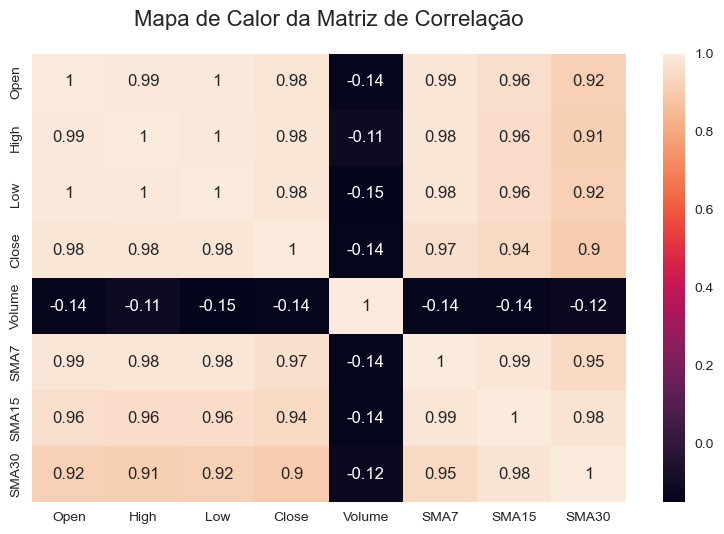

In [28]:
sns.heatmap(ticket.corr(), annot=True)
plt.title('Mapa de Calor da Matriz de Correla√ß√£o', fontsize=16, pad=20)
plt.tight_layout()

plt.show()

No c√≥digo a seguir, est√° sendo utilizada a **fun√ß√£o** `hist` da **classe** `ticket` para gerar um histograma. O **par√¢metro** `figsize` √© usado para definir o tamanho da figura gerada, com dimens√µes de 20 por 20 unidades.

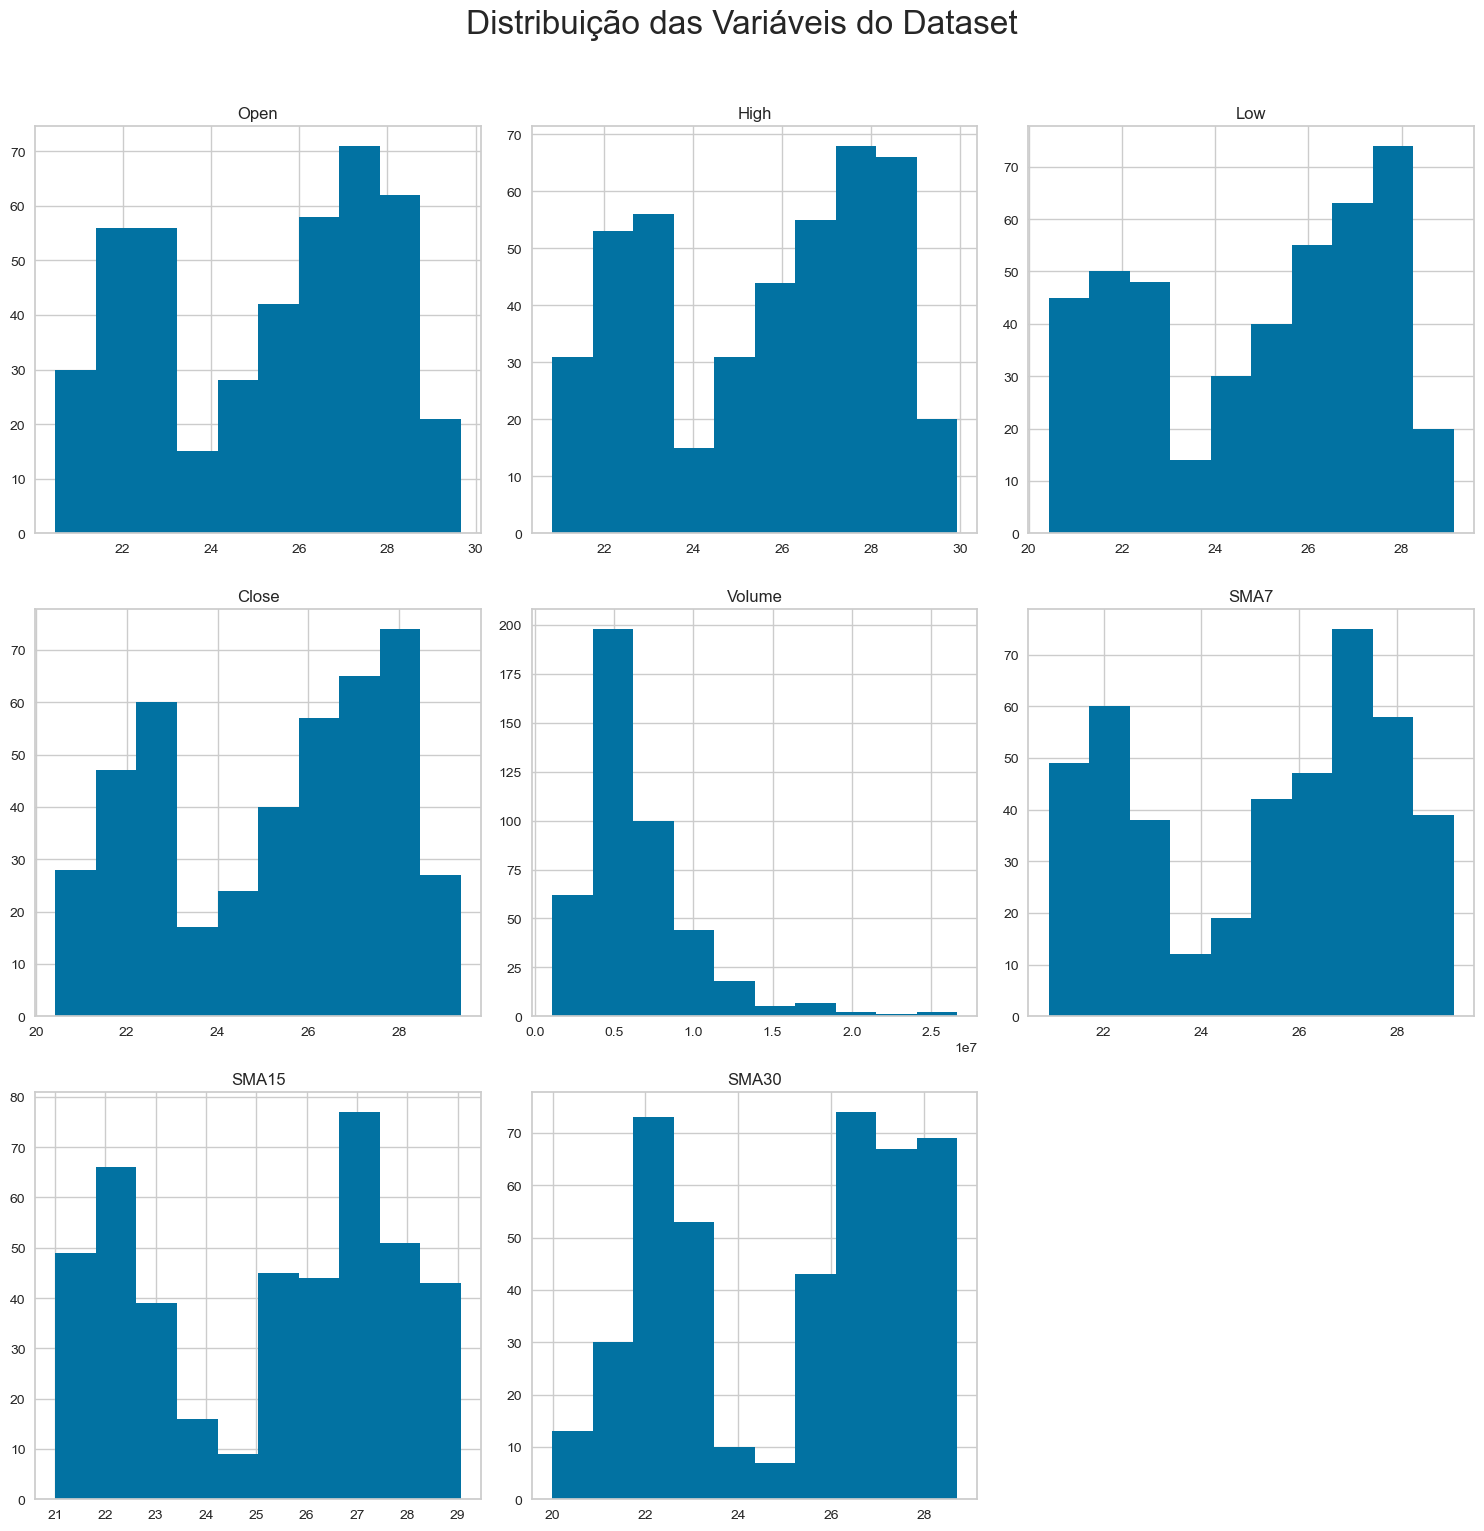

In [30]:
fig = ticket.hist(figsize=(15,15))
plt.suptitle("Distribui√ß√£o das Vari√°veis do Dataset", fontsize=24, y=1.02)
plt.tight_layout()
plt.show()

No c√≥digo a seguir, est√° sendo utilizada a **biblioteca** `seaborn` para criar um gr√°fico de pares com a **fun√ß√£o** `pairplot` aplicada ao **par√¢metro** `ticket`, que representa um DataFrame contendo os dados a serem visualizados. A **fun√ß√£o** `pairplot` gera uma matriz de gr√°ficos de dispers√£o para cada par de vari√°veis no DataFrame, ajudando a identificar rela√ß√µes e padr√µes entre as vari√°veis.

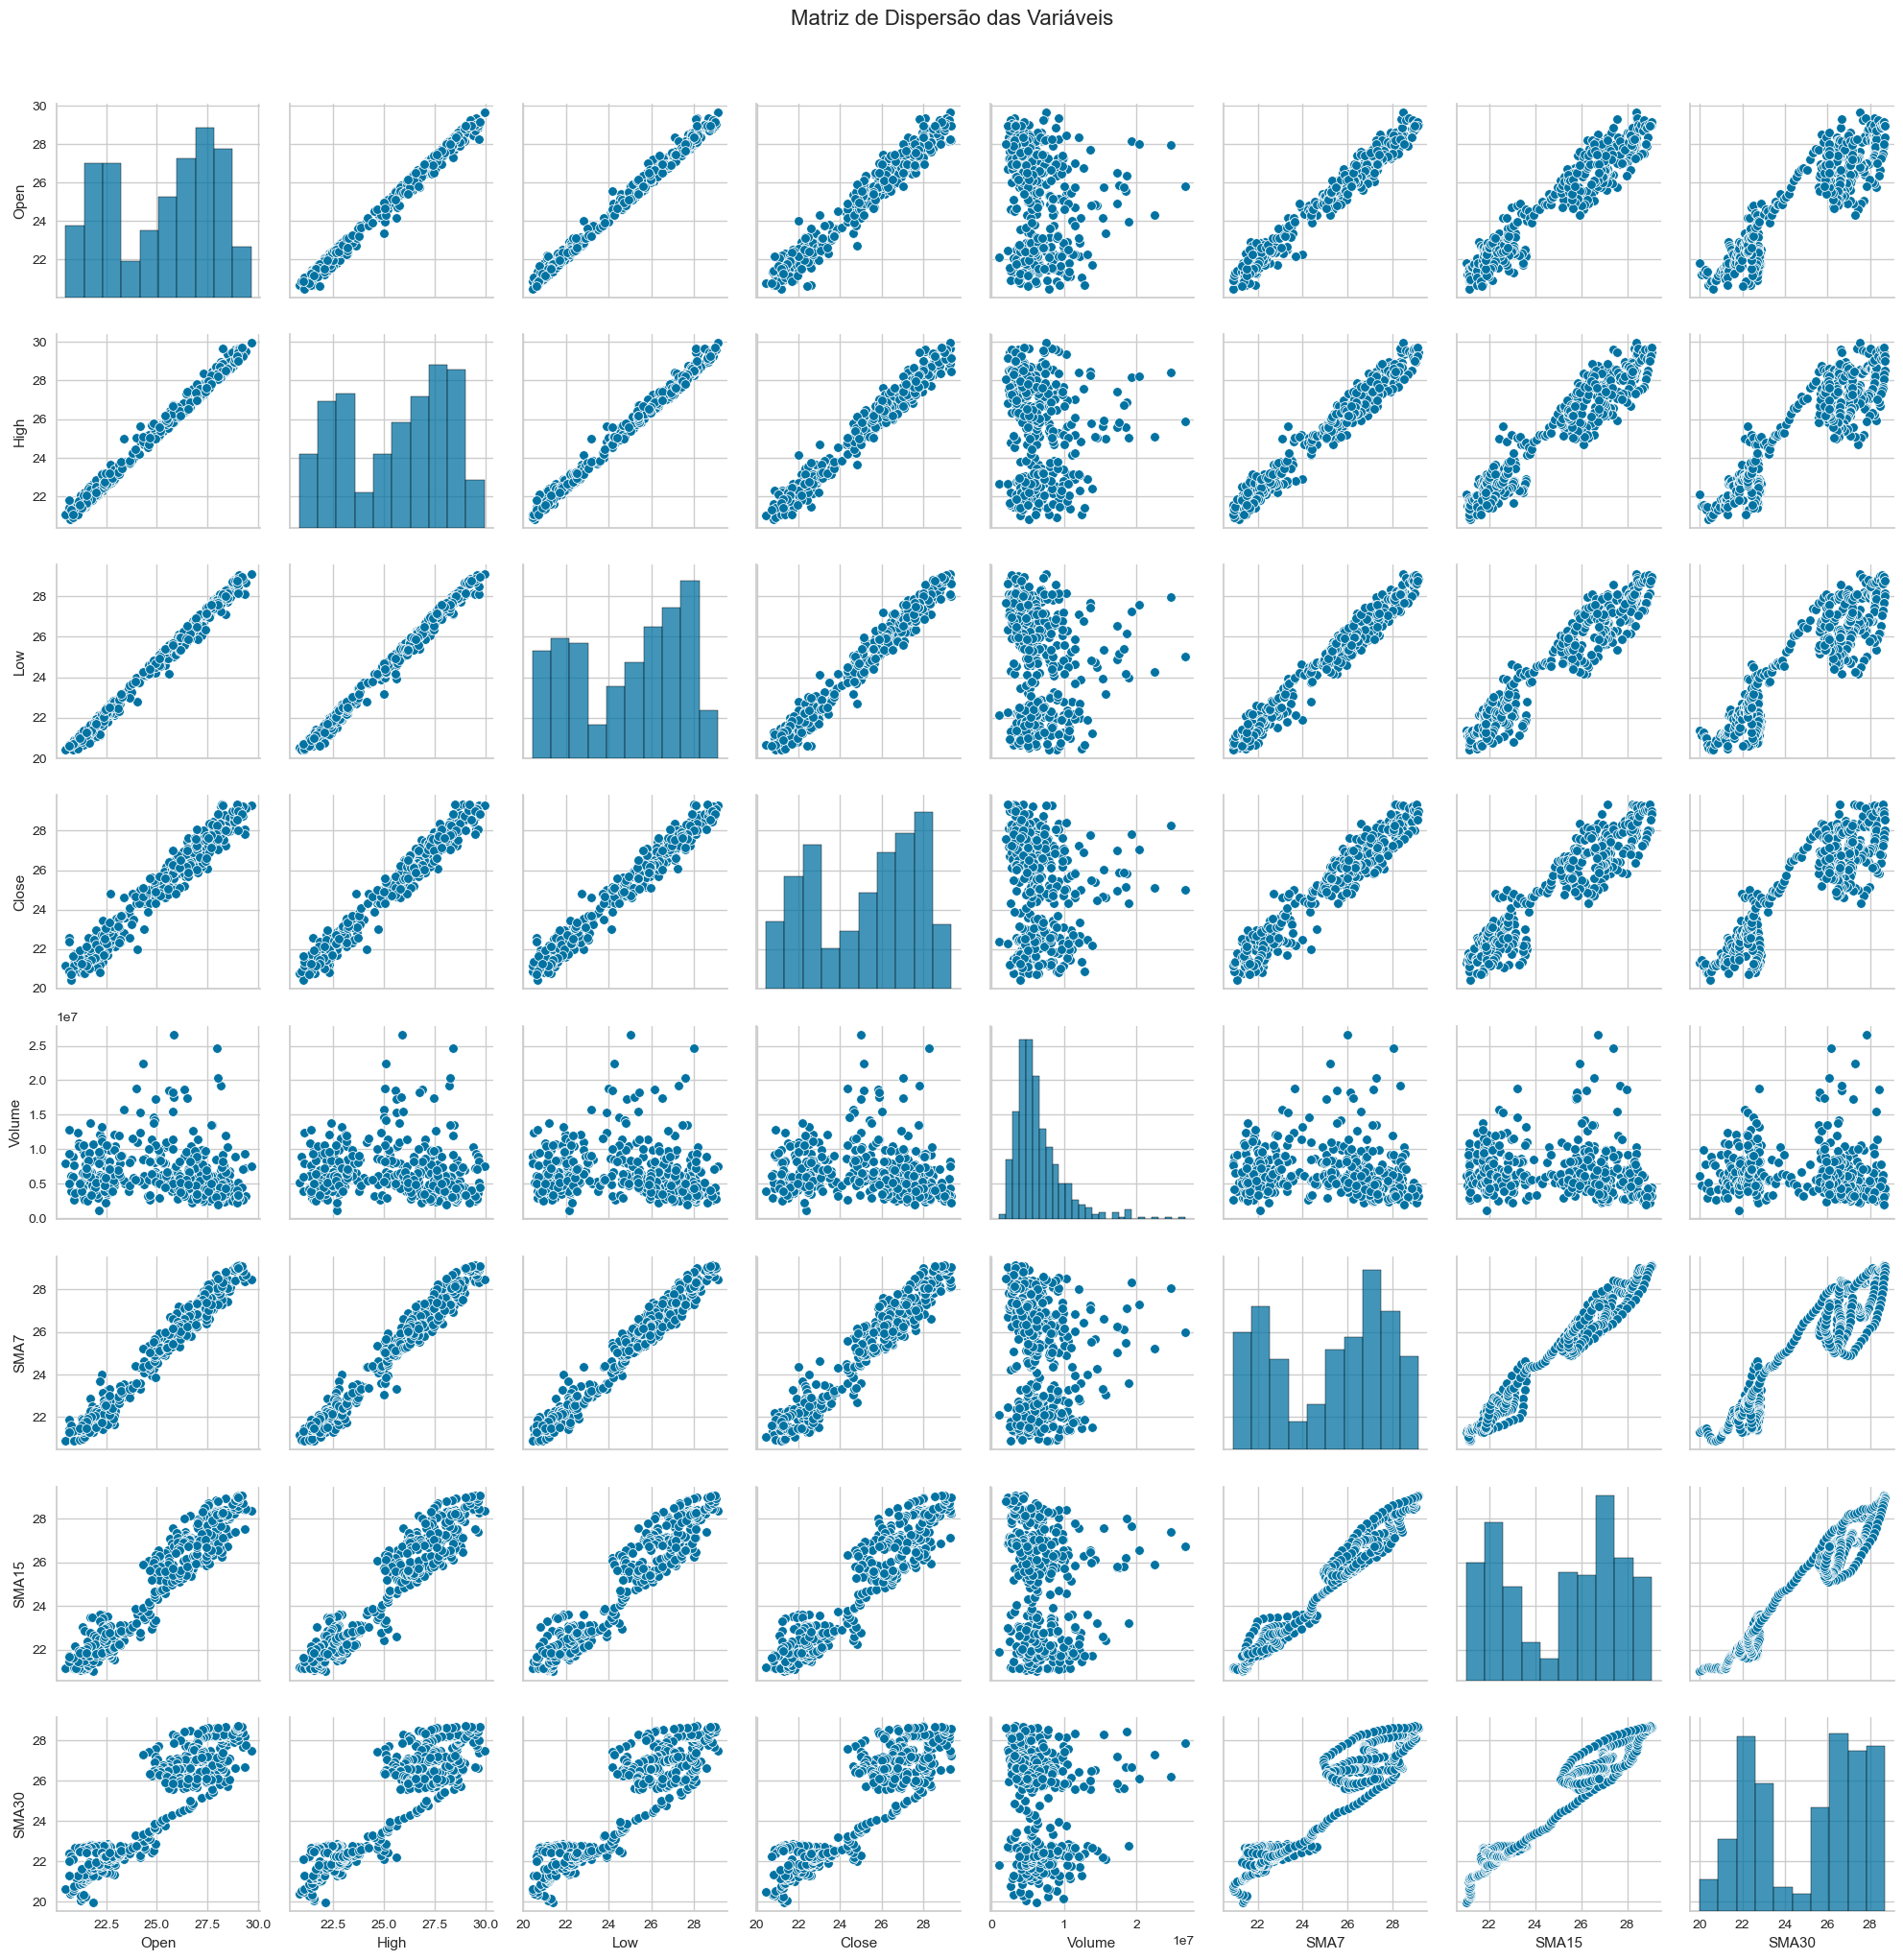

In [32]:
g = sns.pairplot(ticket)
g.fig.suptitle("Matriz de Dispers√£o das Vari√°veis", fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

No c√≥digo a seguir, est√° sendo utilizada a **biblioteca** `seaborn` (abreviada como `sns`) para gerar um histograma com a **fun√ß√£o** `histplot`. O **par√¢metro** `ticket['Close']` indica que os dados para o histograma est√£o sendo extra√≠dos da coluna 'Close' do **dataframe** `ticket`, presumivelmente contendo valores num√©ricos que representam o fechamento de um determinado item ou ativo em diferentes momentos.

<Axes: xlabel='Close', ylabel='Count'>

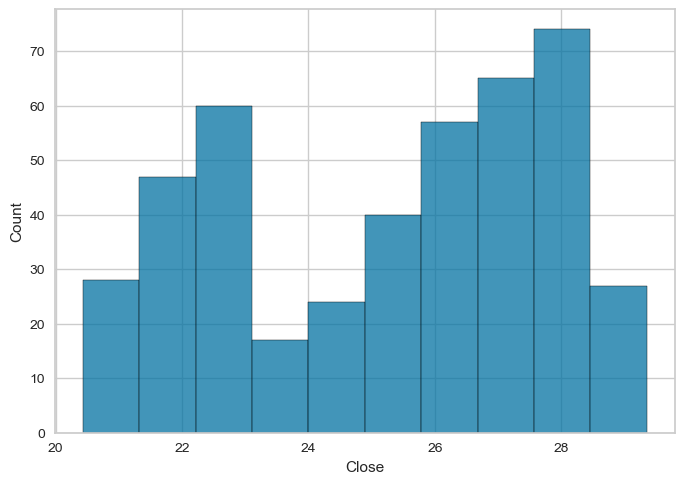

In [18]:
sns.histplot(ticket['Close'])

## <strong><font color=orange> Utilizando `PyCaret` para criar Modelo de Machine Learning </font></strong>

In [ ]:
# Usar esse comando SE precisar atualizar o m√≥dulo
%pip install --upgrade pycaret

### <strong> Importar a biblioteca de Regress√£o do `Pycaret` e visualizar a coluna alvo usando a fun√ß√£o `setup` </strong>

No c√≥digo a seguir, est√° sendo utilizada a **biblioteca** `pycaret.regression` para realizar tarefas de regress√£o. Primeiramente, a biblioteca √© importada com `from pycaret.regression import *`, o que permite acesso a todas as funcionalidades dispon√≠veis na mesma. Em seguida, a **fun√ß√£o** `setup` √© chamada para configurar o ambiente de modelagem, recebendo como **par√¢metros** o **dataframe** `ticket`, o nome da [coluna alvo] `target='Close'`, um **session_id** (usado para garantir a reprodutibilidade dos resultados com a mesmas informa√ß√µes) definido como `123`, e a op√ß√£o `remove_multicollinearity` definida como `False` para n√£o remover colunas com alta correla√ß√£o.

In [19]:
# importar a biblioteca de regress√£o lib pycaret
from pycaret.regression import *

# Analisando a coluna alvo da base de dados
setup(data = ticket, target = 'Close', session_id = 123, remove_multicollinearity=False) 

### <strong> Comparar os modelos e informar os tr√™s melhores escolhidos usando a fun√ß√£o `compare_models` </strong>

No c√≥digo a seguir, est√° sendo utilizada a **fun√ß√£o** `compare_models` da **biblioteca** PyCaret para comparar diferentes modelos de machine learning e selecionar os tr√™s melhores, especificados pelo **par√¢metro** `n_select=3`. Em seguida, os tr√™s melhores modelos s√£o exibidos usando a **fun√ß√£o** `display`. Este processo automatiza a compara√ß√£o de modelos, permitindo ao usu√°rio identificar rapidamente os melhores candidatos para o problema em quest√£o.

In [36]:
top3_models = compare_models(n_select=3)
display(top3_models)

[LinearRegression(n_jobs=-1), Ridge(random_state=123), BayesianRidge()]

#### <strong><font color=red>Observa√ß√µes e Defini√ß√µes de Cada M√©trica</font></strong>

A tabela acima organiza o *ranking* de modelos se baseando no coeficiente de determina√ß√£o R¬≤, que √© uma m√©trica muito utilizada para observar o qu√£o bem o modelo se ajusta ao conjunto de dados utilizado. Com isso, podemos ver que `MAE`, `MSE`, `RMSE`, `R2`, `RMSLE` e `MAPE` s√£o todas m√©tricas utilizadas para avaliar a acur√°cia do nosso modelo:<br>

- **MAE (Mean Absolute Error)**: `MAE` √© a m√©dia dos valores absolutos das diferen√ßas entre os valores previstos e reais. *Menor valor indica melhor performance.* üîª
- **MSE (Mean Squared Error)**: `MSE` √© a m√©dia dos quadrados das diferen√ßas entre os valores previstos e reais. *Menor valor indica melhor performance.* üîª
- **RMSE (Root Mean Squared Error)**: `RMSE` √© a raiz quadrada do MSE. *Menor valor indica melhor performance.* üîª
- **R¬≤ (Coefficient of Determination)**: `R¬≤` varia de 0 a 1, sendo 1 o ideal, indicando que a vari√¢ncia dos dados √© completamente explicada pelo modelo. *Quanto maior, melhor performance.* üî∫
- **RMSLE (Root Mean Squared Logarithmic Error)**: `RMSLE` √© usado principalmente em previs√µes de s√©ries temporais ou quando os valores s√£o exponencialmente distribu√≠dos. *Menor valor indica melhor performance.* üîª
- **MAPE (Mean Absolute Percentage Error)**: `MAPE` mede a m√©dia dos erros percentuais absolutos. *Menor valor indica melhor performance.* üîª<br><hr>

### <strong> Testar os 3 melhores modelos 10 vezes e analisar as m√©dias das m√©tricas de `acur√°cia` </strong>

No c√≥digo a seguir, est√° sendo utilizado a **fun√ß√£o** `create_model` com diferentes par√¢metros para criar os 3 melhores modelos com o par√¢metro `fold=10`. Em seguida, cada modelo criado √© exibido utilizando a **fun√ß√£o** `display`. O par√¢metro `fold=10` sugere que a valida√ß√£o cruzada est√° sendo utilizada com 10 dobras para avaliar o desempenho dos modelos.

In [39]:
model_lr = create_model('lr', fold=10)
display(model_lr)

LinearRegression(n_jobs=-1)

In [40]:
model_ridge = create_model('ridge', fold=10)
display(model_ridge)

Ridge(random_state=123)

In [46]:
model_br = create_model('br', fold=10)
display(model_br)

BayesianRidge()

### <strong> Melhorar ainda mais a performance do modelo usando a fun√ß√£o `tune_model` </strong>

No c√≥digo a seguir, est√° sendo definida uma **biblioteca** `ridge_params` com um par√¢metro **par√¢metro** `alpha` que possui uma lista de valores espec√≠ficos. Em seguida, a fun√ß√£o **fun√ß√£o** `model_tune_model` √© utilizada para ajustar o modelo **modelo** `model_ridge`. O ajuste √© realizado com 1000 itera√ß√µes, otimizando o par√¢metro `RMSE` e utilizando a grade personalizada definida em `ridge_params`. Em seguida, cada modelo criado √© exibido utilizando a **fun√ß√£o** `display`.

In [44]:
model_tune_lr = tune_model(model_lr, n_iter=1000, optimize = 'RMSE')
display(model_tune_lr)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


LinearRegression(n_jobs=-1)

In [42]:
ridge_params = {'alpha': [0.02, 0.024, 0.025, 0.026, 0.03]}
model_tune_ridge = tune_model(model_ridge, n_iter=1000, optimize = 'RMSE', custom_grid = ridge_params)
display(model_tune_ridge)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Ridge(random_state=123)

In [48]:
model_tune_br = tune_model(model_br, n_iter=1000, optimize = 'RMSE')
display(model_tune_br)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


BayesianRidge(alpha_1=0.3, alpha_2=0.001, lambda_1=0.3, lambda_2=0.2)

## <strong><font color=orange> An√°lises gr√°ficas </font></strong>

### <strong> Visualizar os erros do modelo escolhido usando a fun√ß√£o `plot_model` </strong>

No c√≥digo a seguir, est√° sendo utilizada a **fun√ß√£o** `plot_model` para visualizar os erros de dois modelos diferentes. Esta **fun√ß√£o** faz parte da biblioteca `pycaret`, especializada em machine learning. O primeiro **par√¢metro**, `model_ridge`, representa um modelo de regress√£o Ridge previamente treinado. O segundo **par√¢metro**, `model_tune_ridge`, refere-se a uma vers√£o ajustada do mesmo modelo ap√≥s um processo de afina√ß√£o de hiperpar√¢metros. O **par√¢metro** `plot='error'` indica que o tipo de gr√°fico a ser gerado √© o de erros, o que ajuda na an√°lise da performance dos modelos comparando seus erros preditivos.

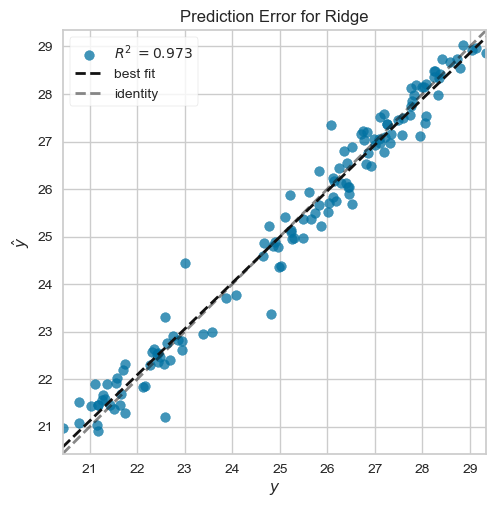

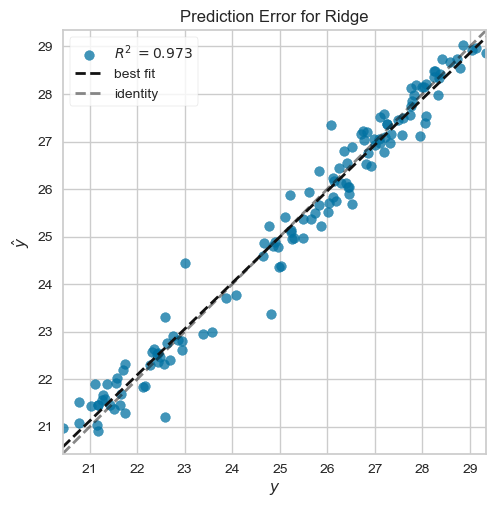

In [51]:
plot_model(model_ridge, plot='error')
plot_model(model_tune_ridge, plot='error')

### <strong> Visualizar a melhor `Feature` utilizada no modelo usando a fun√ß√£o `plot_model` </strong>

No c√≥digo a seguir, est√° sendo utilizada a **fun√ß√£o** `plot_model` da **biblioteca** `pycaret`, que √© uma ferramenta de machine learning automatizada. O **par√¢metro** `model_tune_ridge` representa o modelo de regress√£o Ridge previamente ajustado e treinado. O **par√¢metro** `plot` √© configurado com o valor `'feature'`, indicando que o tipo de gr√°fico a ser gerado √© um gr√°fico de import√¢ncia de caracter√≠sticas. Este gr√°fico visualiza a import√¢ncia de cada vari√°vel de entrada no modelo de regress√£o Ridge ajustado, ajudando a entender quais caracter√≠sticas t√™m mais impacto na predi√ß√£o.

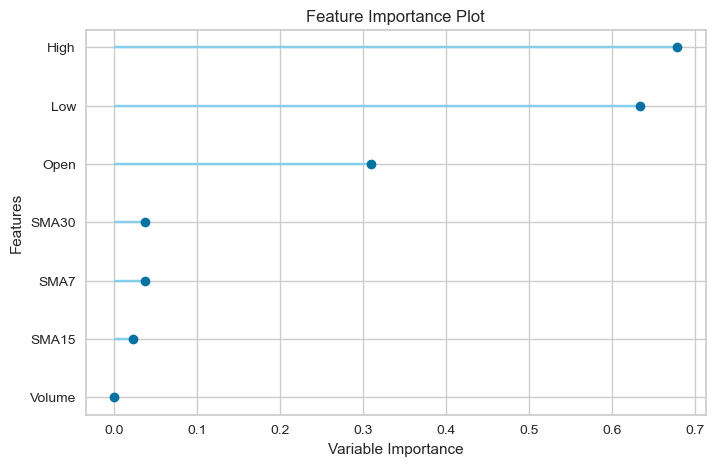

In [54]:
plot_model(model_tune_ridge, plot='feature')

### <strong> Testar os modelos criados com os dados de treinamento usando a fun√ß√£o `predict_model` </strong>

No c√≥digo a seguir, est√° sendo utilizada a **fun√ß√£o** `predict_model` para fazer previs√µes com tr√™s modelos diferentes: `model_tune_lr`, `model_tune_ridge` e `model_tune_br`. A **fun√ß√£o** `predict_model`, que pertence a uma **biblioteca** de aprendizado de m√°quina, recebe como **par√¢metro** um modelo previamente ajustado e gera previs√µes baseadas nos dados fornecidos. O primeiro modelo, `model_tune_lr`, √© provavelmente um modelo de regress√£o linear ajustado; o segundo, `model_tune_ridge`, √© um modelo de regress√£o ridge, que adiciona uma penaliza√ß√£o L2 para evitar overfitting; e o terceiro, `model_tune_br`, √© um modelo de regress√£o bayesiana, que incorpora incertezas dos par√¢metros na previs√£o. Esses modelos s√£o utilizados para comparar diferentes t√©cnicas de regress√£o e avaliar a melhor abordagem para o conjunto de dados em quest√£o.

In [78]:
predict_model(model_tune_lr)

Open       High        Low   Volume       SMA7      SMA15  \
13   20.477781  21.069302  20.440226  7915128  20.879999  21.150000   
125  22.402498  22.440321  22.099888  3965520  22.400000  22.969999   
287  27.347330  27.892492  26.990496  5474300  27.260000  27.040001   
204  28.432692  28.778229  28.314222  6884500  27.920000  27.950001   
172  24.662172  24.927971  24.529274  3408288  24.420000  24.040001   
..         ...        ...        ...      ...        ...        ...   
318  28.100645  28.507038  27.882580  2806700  27.780001  26.639999   
151  22.355211  22.638906  22.043148  5394896  22.590000  22.520000   
157  23.622387  23.735865  22.998257  8104616  22.910000  22.809999   
260  26.810108  27.512512  26.622141  5664400  26.889999  26.879999   
372  25.303783  25.403248  24.886032  7964300  24.950001  25.440001   

         SMA30      Close  prediction_label  
13   20.620001  21.172581         20.914297  
125  22.750000  21.749994         22.318744  
287  27.080000  27.496012         27.465242  
204  26.980000  28.235243         28.505320  
172  23.430000  24.956448         24.791993  
..         ...        ...               ...  
318  26.530001  28.070910         28.221061  
151  22.240000  22.695650         22.398206  
157  22.389999  22.582170         23.290744  
260  27.510000  27.334436         27.180863  
372  26.790001  25.244102         25.134872  

[133 rows x 9 columns]

In [82]:
predict_model(model_tune_ridge)

Open       High        Low   Volume       SMA7      SMA15  \
13   20.477781  21.069302  20.440226  7915128  20.879999  21.150000   
125  22.402498  22.440321  22.099888  3965520  22.400000  22.969999   
287  27.347330  27.892492  26.990496  5474300  27.260000  27.040001   
204  28.432692  28.778229  28.314222  6884500  27.920000  27.950001   
172  24.662172  24.927971  24.529274  3408288  24.420000  24.040001   
..         ...        ...        ...      ...        ...        ...   
318  28.100645  28.507038  27.882580  2806700  27.780001  26.639999   
151  22.355211  22.638906  22.043148  5394896  22.590000  22.520000   
157  23.622387  23.735865  22.998257  8104616  22.910000  22.809999   
260  26.810108  27.512512  26.622141  5664400  26.889999  26.879999   
372  25.303783  25.403248  24.886032  7964300  24.950001  25.440001   

         SMA30      Close  prediction_label  
13   20.620001  21.172581         20.899930  
125  22.750000  21.749994         22.326223  
287  27.080000  27.496012         27.459626  
204  26.980000  28.235243         28.493428  
172  23.430000  24.956448         24.788792  
..         ...        ...               ...  
318  26.530001  28.070910         28.218340  
151  22.240000  22.695650         22.402713  
157  22.389999  22.582170         23.306978  
260  27.510000  27.334436         27.165228  
372  26.790001  25.244102         25.143951  

[133 rows x 9 columns]

In [80]:
predict_model(model_tune_br)

Open       High        Low   Volume       SMA7      SMA15  \
13   20.477781  21.069302  20.440226  7915128  20.879999  21.150000   
125  22.402498  22.440321  22.099888  3965520  22.400000  22.969999   
287  27.347330  27.892492  26.990496  5474300  27.260000  27.040001   
204  28.432692  28.778229  28.314222  6884500  27.920000  27.950001   
172  24.662172  24.927971  24.529274  3408288  24.420000  24.040001   
..         ...        ...        ...      ...        ...        ...   
318  28.100645  28.507038  27.882580  2806700  27.780001  26.639999   
151  22.355211  22.638906  22.043148  5394896  22.590000  22.520000   
157  23.622387  23.735865  22.998257  8104616  22.910000  22.809999   
260  26.810108  27.512512  26.622141  5664400  26.889999  26.879999   
372  25.303783  25.403248  24.886032  7964300  24.950001  25.440001   

         SMA30      Close  prediction_label  
13   20.620001  21.172581         20.900916  
125  22.750000  21.749994         22.325678  
287  27.080000  27.496012         27.460034  
204  26.980000  28.235243         28.494254  
172  23.430000  24.956448         24.789016  
..         ...        ...               ...  
318  26.530001  28.070910         28.218560  
151  22.240000  22.695650         22.402387  
157  22.389999  22.582170         23.305847  
260  27.510000  27.334436         27.166345  
372  26.790001  25.244102         25.143334  

[133 rows x 9 columns]

#### <strong><font color=red>Observa√ß√µes e An√°lises dos Modelos</font></strong>

Qual modelo a seguir devo escolher para prever o fechamento de uma a√ß√£o e qual a justificativa da escolha? Deve-se escolher o modelo **Linear Regression** para prever o fechamento de uma a√ß√£o. A justificativa para esta escolha √© baseada no desempenho dos modelos nas m√©tricas apresentadas:

- **MAE (Mean Absolute Error)**: O Linear Regression tem o menor MAE entre os tr√™s modelos, indicando que, em m√©dia, suas previs√µes est√£o mais pr√≥ximas dos valores reais.
  
- **MSE (Mean Squared Error)** e **RMSE (Root Mean Squared Error)**: Embora o Linear Regression n√£o tenha o menor MSE e RMSE, a diferen√ßa em rela√ß√£o aos outros modelos √© muito pequena. Essas m√©tricas penalizam erros maiores, ent√£o uma diferen√ßa pequena j√° sugere um bom desempenho.

- **R2 (Coefficient of Determination)**: O Linear Regression tem o maior R2, o que significa que ele explica uma maior propor√ß√£o da varia√ß√£o nos dados de fechamento da a√ß√£o em compara√ß√£o com os outros modelos.

- **RMSLE (Root Mean Squared Logarithmic Error)** e **MAPE (Mean Absolute Percentage Error)**: O Linear Regression tem o menor RMSLE e MAPE, indicando que ele √© mais preciso ao prever varia√ß√µes percentuais nos dados de fechamento da a√ß√£o.

Portanto, considerando todas essas m√©tricas, o Linear Regression apresenta um equil√≠brio entre precis√£o nas previs√µes e capacidade de explicar a variabilidade dos dados, tornando-o a escolha mais adequada para esta tarefa.<br><hr>

### <strong> Finalizar o modelo com a fun√ß√£o `finalize_model` e fazer a previs√£o com a fun√ß√£o `predict_model` </strong>

No c√≥digo a seguir, est√° sendo utilizado um modelo de aprendizado de m√°quina. A fun√ß√£o **`finalize_model`** (Fun√ß√£o) √© usada para finalizar o ajuste de um modelo pr√©-treinado, **`model_tune_lr`** (Par√¢metro). Em seguida, o modelo finalizado, **`final_lr_model`** (Par√¢metro), √© usado para fazer previs√µes com a fun√ß√£o **`predict_model`** (Fun√ß√£o), onde o par√¢metro **`data`** √© definido como **`ticket_text`** (Par√¢metro). O resultado das previs√µes √© armazenado na vari√°vel **`predict`** (Par√¢metro). Finalmente, o resultado das previs√µes √© exibido usando a fun√ß√£o **`display`** (Fun√ß√£o).

In [84]:
final_lr_model = finalize_model(model_tune_lr)
predict = predict_model(final_lr_model, data = ticket_text)
display(predict)

Open       High        Low    Volume       SMA7      SMA15  \
0   26.533400  26.553366  25.854591   4917300  27.190001  26.750000   
1   26.104155  26.203979  25.714838   2607500  26.940001  26.719999   
2   26.034275  26.104153  25.654942   5634200  26.690001  26.700001   
3   25.664925  25.984365  25.455294   3060600  26.410000  26.670000   
4   25.525169  25.595047  24.846361  16080800  26.030001  26.590000   
5   24.936205  25.335503  24.826399   3414000  25.740000  26.559999   
6   24.986118  25.375433  24.856344   3157900  25.530001  26.469999   
7   24.956169  25.375433  24.876310   4225200  25.370001  26.330000   
8   24.766502  25.305557  24.526924   4517500  25.260000  26.200001   
9   24.716591  25.684889  24.716591   6116900  25.190001  26.049999   
10  25.075960  25.265625  24.956169   2497300  25.090000  25.879999   
11  25.155821  25.325521  24.846361   4039200  25.090000  25.700001   
12  25.105906  25.205730  24.367203  11022900  25.030001  25.500000   
13  24.626749  25.145838  24.447063   5888700  24.990000  25.350000   
14  24.886293  25.824646  24.886293   5630700  25.100000  25.290001   
15  25.654943  25.654943  24.816416   5162700  25.090000  25.219999   
16  25.026047  25.026047  24.437080   6273500  24.980000  25.129999   
17  24.516941  24.846363  24.277363   4512800  24.930000  25.059999   
18  25.036028  25.145836  24.277361   6328700  24.889999  24.990000   
19  24.716591  25.754766  24.606783  10545000  25.040001  25.040001   
20  25.744785  26.253891  25.435328   6986900  25.209999  25.110001   
21  26.134102  26.323769  25.954416   9733400  25.309999  25.190001   
22  26.054241  26.363697  25.974380   6103800  25.500000  25.280001   
23  26.253891  26.643208  26.094172   3490000  25.790001  25.379999   
24  26.313786  26.403627  25.395399   8547600  25.920000  25.400000   
25  25.255644  25.694872  25.215715   2775200  26.040001  25.430000   
26  25.634977  25.634977  25.185766   3496200  25.969999  25.450001   
27  25.455294  25.824646  25.305557   5888600  25.889999  25.510000   
28  25.879999  25.879999  25.020000   4933900  25.719999  25.530001   
29  25.250000  25.600000  25.209999   1355600  25.580000  25.510000   

        SMA30      Close  prediction_label  
0   26.080000  26.014311         25.997585  
1   26.070000  25.874557         25.868400  
2   26.059999  25.784714         25.766557  
3   26.080000  25.754766         25.741328  
4   26.090000  25.026047         24.972951  
5   26.100000  25.135855         25.171109  
6   26.090000  25.135855         25.214053  
7   26.070000  24.906258         25.242522  
8   26.070000  25.085941         25.029556  
9   26.090000  25.275608         25.463001  
10  26.090000  25.055994         25.207748  
11  26.080000  25.026047         25.125309  
12  26.040001  24.696625         24.651435  
13  26.020000  24.916239         24.937307  
14  26.020000  25.654943         25.637407  
15  25.980000  25.026047         25.115886  
16  25.920000  24.457047         24.657309  
17  25.879999  24.726574         24.659789  
18  25.830000  24.746538         24.628070  
19  25.820000  25.754766         25.412974  
20  25.830000  26.134102         25.938579  
21  25.830000  26.323769         26.156799  
22  25.809999  26.363697         26.259018  
23  25.790001  26.493471         26.468283  
24  25.719999  25.634977         25.698241  
25  25.660000  25.555119         25.572514  
26  25.570000  25.275608         25.325220  
27  25.510000  25.595047         25.610649  
28  25.440001  25.139999         25.263700  
29  25.400000  25.350000         25.521727

### <strong> Salvar o modelo para utilizar com os dados novos usando a fun√ß√£o `save_model` </strong>

No c√≥digo a seguir, est√° sendo utilizada a **fun√ß√£o** `save_model` para salvar um modelo de aprendizado de m√°quina. O primeiro **par√¢metro**, `final_lr_model`, representa o modelo final de regress√£o linear que foi treinado e ajustado, utilizando a **biblioteca** `PyCaret`, que √© uma ferramenta de automa√ß√£o de machine learning. O segundo **par√¢metro**, `'Modelo Final LR PyCaret'`, √© uma string que especifica o nome do arquivo em que o modelo ser√° salvo. Assim, o modelo treinado pode ser armazenado para uso posterior, evitando a necessidade de re-treinamento.

In [85]:
save_model(final_lr_model, 'Modelo Final LR PyCaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Open', 'High', 'Low', 'Volume',
                                              'SMA7', 'SMA15', 'SMA30'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator', LinearRegression(n_jobs=-1))]),
 'Modelo Final LR PyCaret.pkl')

### <strong> Buscar novos dados usando a fun√ß√£o `download` </strong>

No c√≥digo a seguir, est√° sendo utilizado a **biblioteca** `yfinance` para baixar dados hist√≥ricos de a√ß√µes. A **fun√ß√£o** `download` √© chamada com o **par√¢metro** `'RADL3.SA'`, que especifica o c√≥digo do ativo da Raia Drogasil na bolsa de valores brasileira, e o **par√¢metro** `period='3mo'`, que define o per√≠odo de tr√™s meses para os dados. Em seguida, a **fun√ß√£o** `display` √© utilizada para exibir o conte√∫do do **dataframe** `new_ticket` que cont√©m os dados baixados.

In [20]:
new_ticket = yf.download('RADL3.SA', period='3mo')
display(new_ticket)

[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2024-04-09  26.410000  26.940001  26.370001  26.850000  26.750021  3428800
2024-04-10  26.750000  27.000000  26.250000  26.379999  26.281769  8210400
2024-04-11  26.200001  26.410000  26.070000  26.350000  26.251881  4329100
2024-04-12  26.110001  26.750000  26.080000  26.360001  26.261845  6572900
2024-04-15  26.230000  26.410000  26.049999  26.200001  26.102440  6162400
...               ...        ...        ...        ...        ...      ...
2024-07-03  25.500000  25.870001  25.350000  25.639999  25.595047  5888600
2024-07-04  25.879999  25.879999  25.020000  25.139999  25.139999  4933900
2024-07-05  25.250000  25.600000  25.200001  25.290001  25.290001  4429700
2024-07-08  25.389999  25.469999  25.090000  25.150000  25.150000  2898500
2024-07-09  25.030001  25.469999  24.959999  25.270000  25.270000  5313900

[64 rows x 6 columns]

### <strong> Refazer os tratamentos dos novos dados usando as fun√ß√µes `drop`, `reset_index` e `rolling` </strong>

No c√≥digo a seguir, est√° sendo realizada a manipula√ß√£o de um *DataFrame* utilizando a **biblioteca** *Pandas* para calcular m√©dias m√≥veis simples (SMAs) sobre os pre√ßos de fechamento de a√ß√µes. Primeiramente, a coluna 'Adj Close' √© removida do *DataFrame* `new_ticket` com a **fun√ß√£o** `drop()`, especificando o **par√¢metro** `axis=1` para indicar que a opera√ß√£o deve ser feita em colunas. Em seguida, os √≠ndices do *DataFrame* s√£o redefinidos com a **fun√ß√£o** `reset_index()`, usando `drop=True` para descartar o √≠ndice antigo e `inplace=True` para aplicar a mudan√ßa diretamente no objeto `new_ticket`. Tr√™s novas colunas s√£o criadas para armazenar as m√©dias m√≥veis simples de 7, 15 e 30 dias sobre os pre√ßos de fechamento, utilizando a **fun√ß√£o** `rolling()` para calcular a m√©dia dentro das janelas de tempo especificadas, seguida de `mean()` para calcular a m√©dia e `round(2)` para arredondar o resultado para duas casas decimais. Finalmente, o *DataFrame* atualizado √© exibido utilizando a **fun√ß√£o** `display()`.

In [21]:
new_ticket = new_ticket.drop('Adj Close', axis=1)
new_ticket.reset_index(drop=True, inplace=True)

new_ticket['SMA7'] = new_ticket['Close'].rolling(window=7).mean().round(2)
new_ticket['SMA15'] = new_ticket['Close'].rolling(window=15).mean().round(2)
new_ticket['SMA30'] = new_ticket['Close'].rolling(window=30).mean().round(2)

display(new_ticket)

Open       High        Low      Close   Volume   SMA7  SMA15  SMA30
0   26.410000  26.940001  26.370001  26.850000  3428800    NaN    NaN    NaN
1   26.750000  27.000000  26.250000  26.379999  8210400    NaN    NaN    NaN
2   26.200001  26.410000  26.070000  26.350000  4329100    NaN    NaN    NaN
3   26.110001  26.750000  26.080000  26.360001  6572900    NaN    NaN    NaN
4   26.230000  26.410000  26.049999  26.200001  6162400    NaN    NaN    NaN
..        ...        ...        ...        ...      ...    ...    ...    ...
59  25.500000  25.870001  25.350000  25.639999  5888600  25.94  25.56  25.55
60  25.879999  25.879999  25.020000  25.139999  4933900  25.76  25.57  25.48
61  25.250000  25.600000  25.200001  25.290001  4429700  25.60  25.54  25.44
62  25.389999  25.469999  25.090000  25.150000  2898500  25.40  25.55  25.41
63  25.030001  25.469999  24.959999  25.270000  5313900  25.34  25.60  25.39

[64 rows x 8 columns]

### <strong> Obter o √∫ltimo registro dos dados usando a fun√ß√£o `tail(1)` </strong>

No c√≥digo a seguir, est√° sendo utilizada a **fun√ß√£o** `tail` da **biblioteca** `pandas` para obter o √∫ltimo registro do **DataFrame** `new_ticket`, atribuindo-o de volta √† vari√°vel `new_ticket`. Em seguida, a **fun√ß√£o** `display`, da **biblioteca** `IPython.display`, √© usada para exibir o conte√∫do de `new_ticket`.

In [22]:
new_ticket = new_ticket.tail(1)
display(new_ticket)

Open       High        Low  Close   Volume   SMA7  SMA15  SMA30
63  25.030001  25.469999  24.959999  25.27  5313900  25.34   25.6  25.39

### <strong> Carregar um modelo previamente treinado usando a fun√ß√£o `load_model` </strong>

No c√≥digo a seguir, est√° sendo utilizada a **fun√ß√£o** `load_model` para carregar um modelo de aprendizado de m√°quina previamente treinado e salvo com o nome 'Modelo Final LR PyCaret'. A **vari√°vel** `saved_final_ticket_model` armazena este modelo carregado. A **fun√ß√£o** `load_model` faz parte da **biblioteca** PyCaret, que √© uma **biblioteca** de aprendizado de m√°quina que facilita a cria√ß√£o e a implementa√ß√£o de modelos de machine learning.

In [23]:
saved_final_ticket_model = load_model('Modelo Final LR PyCaret')

Transformation Pipeline and Model Successfully Loaded


### <strong> Realizar uma previs√£o com novos dados usando a fun√ß√£o `predict_model` </strong>

No c√≥digo a seguir, est√° sendo utilizada a **fun√ß√£o** `predict_model` da **biblioteca** `pycaret` para realizar uma previs√£o com o **modelo** `saved_final_ticket_model`, utilizando os dados contidos no **par√¢metro** `data=new_ticket`. O resultado da previs√£o √© armazenado na vari√°vel `new_prediction`, e em seguida, a **fun√ß√£o** `head()` √© chamada para exibir as primeiras linhas do resultado da previs√£o.

In [24]:
new_prediction = predict_model(saved_final_ticket_model, data=new_ticket)
new_prediction.head()

Open       High        Low   Volume   SMA7  SMA15      SMA30  Close  \
63  25.030001  25.469999  24.959999  5313900  25.34   25.6  25.389999  25.27   

    prediction_label  
63         25.315722